# Unsupervised Machine Learning for the Classification of Astrophysical X-ray Sources
###### *Víctor Samuel Pérez Díaz<sup>1</sup>, Rafael Martinez-Galarza<sup>2</sup>, Alexander Caicedo-Dorado<sup>1</sup>, Raffaele D'Abrusco<sup>2</sup>*

*1. Universidad del Rosario, 2. Center for Astrophysics | Harvard & Smithsonian*

---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from pylab import cm
import math

In [2]:
# Edit the font, font size, and axes width

mpl.rcParams['font.family'] = 'Avenir LT Std'
plt.rcParams['font.size'] = 14
plt.rcParams['axes.linewidth'] = 2

#### Probability plots

We are going to produce some probability distribution plots in order to compare the different results from our pipelines. In order to separate observations we can do two things, separate them by using our assigned main_type, or selecting the clusters that have a particular predominance.

We are going with the second to select the observations that were used in the first x-ray pipeline. We observed that clusters 1, 2 and 3 tended to have a predominance in AGN and QSO.

In [28]:
cl0_xray = pd.read_csv('./class_data_xray/cl0_mean.csv')
cl1_xray = pd.read_csv('./class_data_xray/cl1_mean.csv')
cl2_xray = pd.read_csv('./class_data_xray/cl2_mean.csv')
cl3_xray = pd.read_csv('./class_data_xray/cl3_mean.csv')
cl5_xray = pd.read_csv('./class_data_xray/cl5_mean.csv')

In [12]:
def generate_probability_plot(src_name, src_obsid, df1, df2):
    probas1 = df1[(df1.name == src_name) & (df1.obsid == src_obsid)]
    probas1 = probas1.iloc[:, -3:]
    print(probas1)
    
    probas2 = df2[(df2.name == src_name) & (df2.obsid == src_obsid)]
    probas2 = probas2.iloc[:, -5:]
    plt.plot(probas2.columns, probas2.iloc[0], marker='x', color='red', linestyle='dashdot')
    plt.plot(probas1.columns, probas1.iloc[0], marker='o', color='blue', linestyle='dashed')
    plt.title('Probabilities for ' + src_name + ', obsid: ' + str(src_obsid))
    plt.legend(['CSC', 'CSC + SDSS'])
    plt.ylim([0, 1])
    plt.show()

         AGN       QSO  Seyfert_1
59  0.323618  0.309386   0.366996


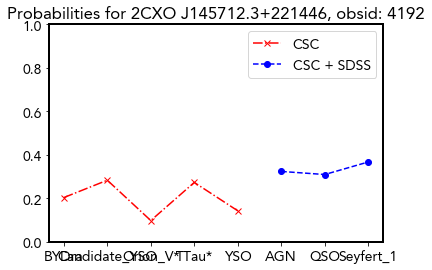

In [13]:
generate_probability_plot(src_nname, 4192, cl4_optixray, cl0_xray)

Comparing multiple observations classification probabilities:

1. Merge all the optixray classification tables.
2. Merge a particular xray table with the table created in 1.
3. Visualize in two different ways: putting all the observations in one plot, or plotting by observation.

In [19]:
def gen_particular_prob_plots(xray_cl):
    colors = cm.get_cmap('tab10', 4)
    
    nrow = 40; ncol = 6;
    fig, axs = plt.subplots(nrows=nrow, ncols=ncol, figsize=(14,84))
    fig.tight_layout(h_pad=8)
    for i, ax in enumerate(axs.reshape(-1)): 
        
        ax.yaxis.set_tick_params(which='major', size=6, width=0.5, direction='in')
        ax.yaxis.set_tick_params(which='minor', size=3, width=0.5, direction='in')
        ax.xaxis.set_tick_params(which='major', size=6, width=0.5, direction='out')
        ax.xaxis.set_tick_params(which='minor', size=3, width=0.5, direction='out')
        ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(0.25))
        ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.125))
        #ax.set_xlabel('Class', labelpad=10)
        #ax.set_ylabel('Probability', labelpad=10)
         
        row = xray_cl.loc[i]
        probas = row[xray_cl.columns.get_loc('main_type')+1:]
        classes = row.index[xray_cl.columns.get_loc('main_type')+1:]
        
        ax.plot(classes, probas, marker='o', color=colors(0), lw=1, ms=5, label='CSC')
        if probas.max() > 0.5:
            ax.set_ylim(0, 1)
        if probas.max() <= 0.5:
            ax.set_ylim(0, 0.5)
        ax.set_title(row['name']+', '+str(row['obsid']), fontsize=8)
        plt.setp(ax.xaxis.get_majorticklabels(), rotation=90)
        handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, bbox_to_anchor=(0.5, 1.01))
    
    plt.savefig('figures/xray_only_5_longplot.pdf', dpi=300, transparent=False, bbox_inches='tight')
    

'AvenirLTStd-Roman.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


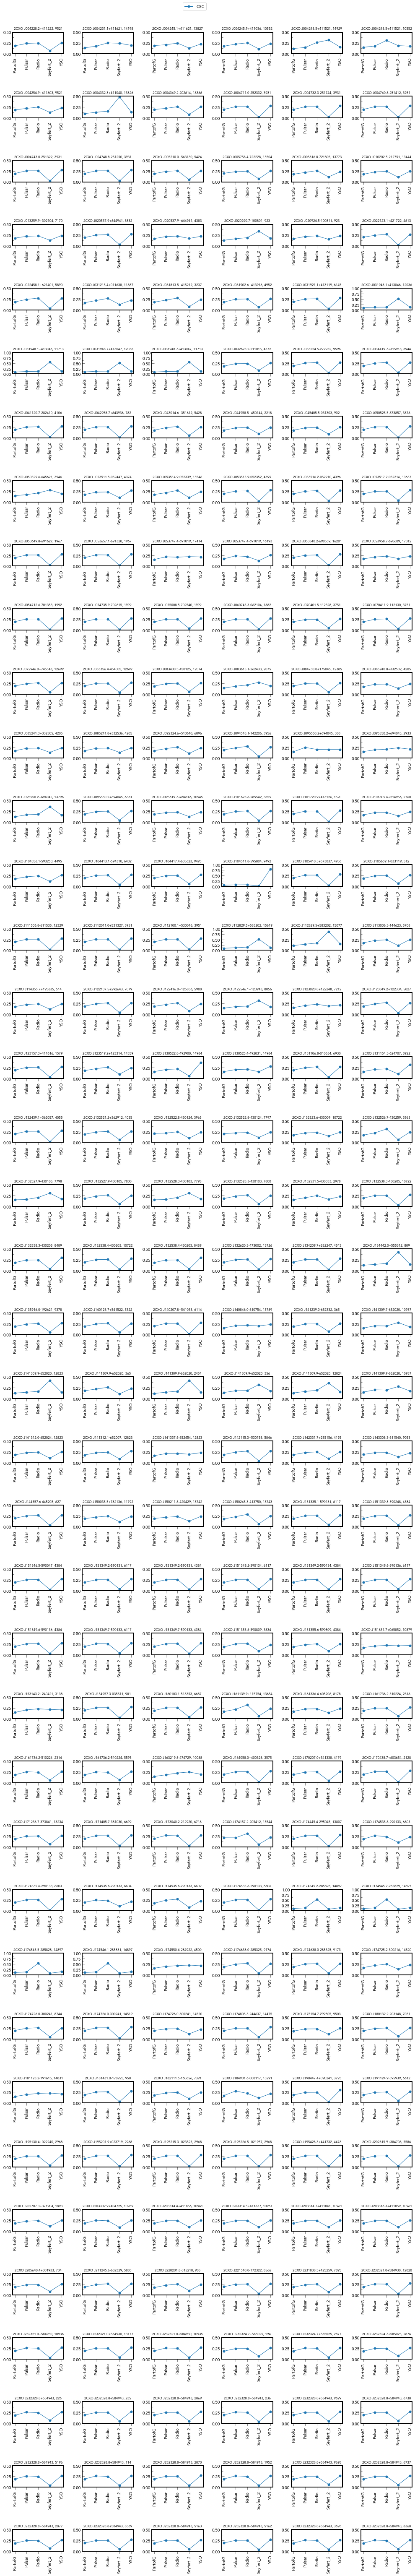

In [32]:
plt.rcParams['font.size'] = 10
gen_particular_prob_plots(cl5_xray.sort_values(by='Seyfert_2', ascending=False))